In [1]:
import warnings
from importlib import reload

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import acquire as a
import prepare as p
import explore as e
import model as m

In [2]:
warnings.simplefilter("ignore")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
readme_df = a.acquire_readmes()
readme_df = p.prep_df_for_nlp(readme_df,'readme_contents')


In [6]:
train, validate, test = p.split_data(readme_df,'language')

In [94]:
from sklearn.preprocessing import MinMaxScaler


reload(m)
# encode_has_language
train_x = m.encode_has_language(train)
valid_x = m.encode_has_language(validate)
#scale lemmatized_len
scaler = MinMaxScaler()
scaled_valid = m.scale(validate.lemmatized_len,scaler)
scaled_train = m.scale(train.lemmatized_len,scaler)
#concat scaled_train and encoded_has_language
train_x = pd.concat([scaled_train,train_x],axis=1)
train_y = train.language
valid_x = pd.concat([scaled_valid,valid_x],axis=1)
valid_y = validate.language


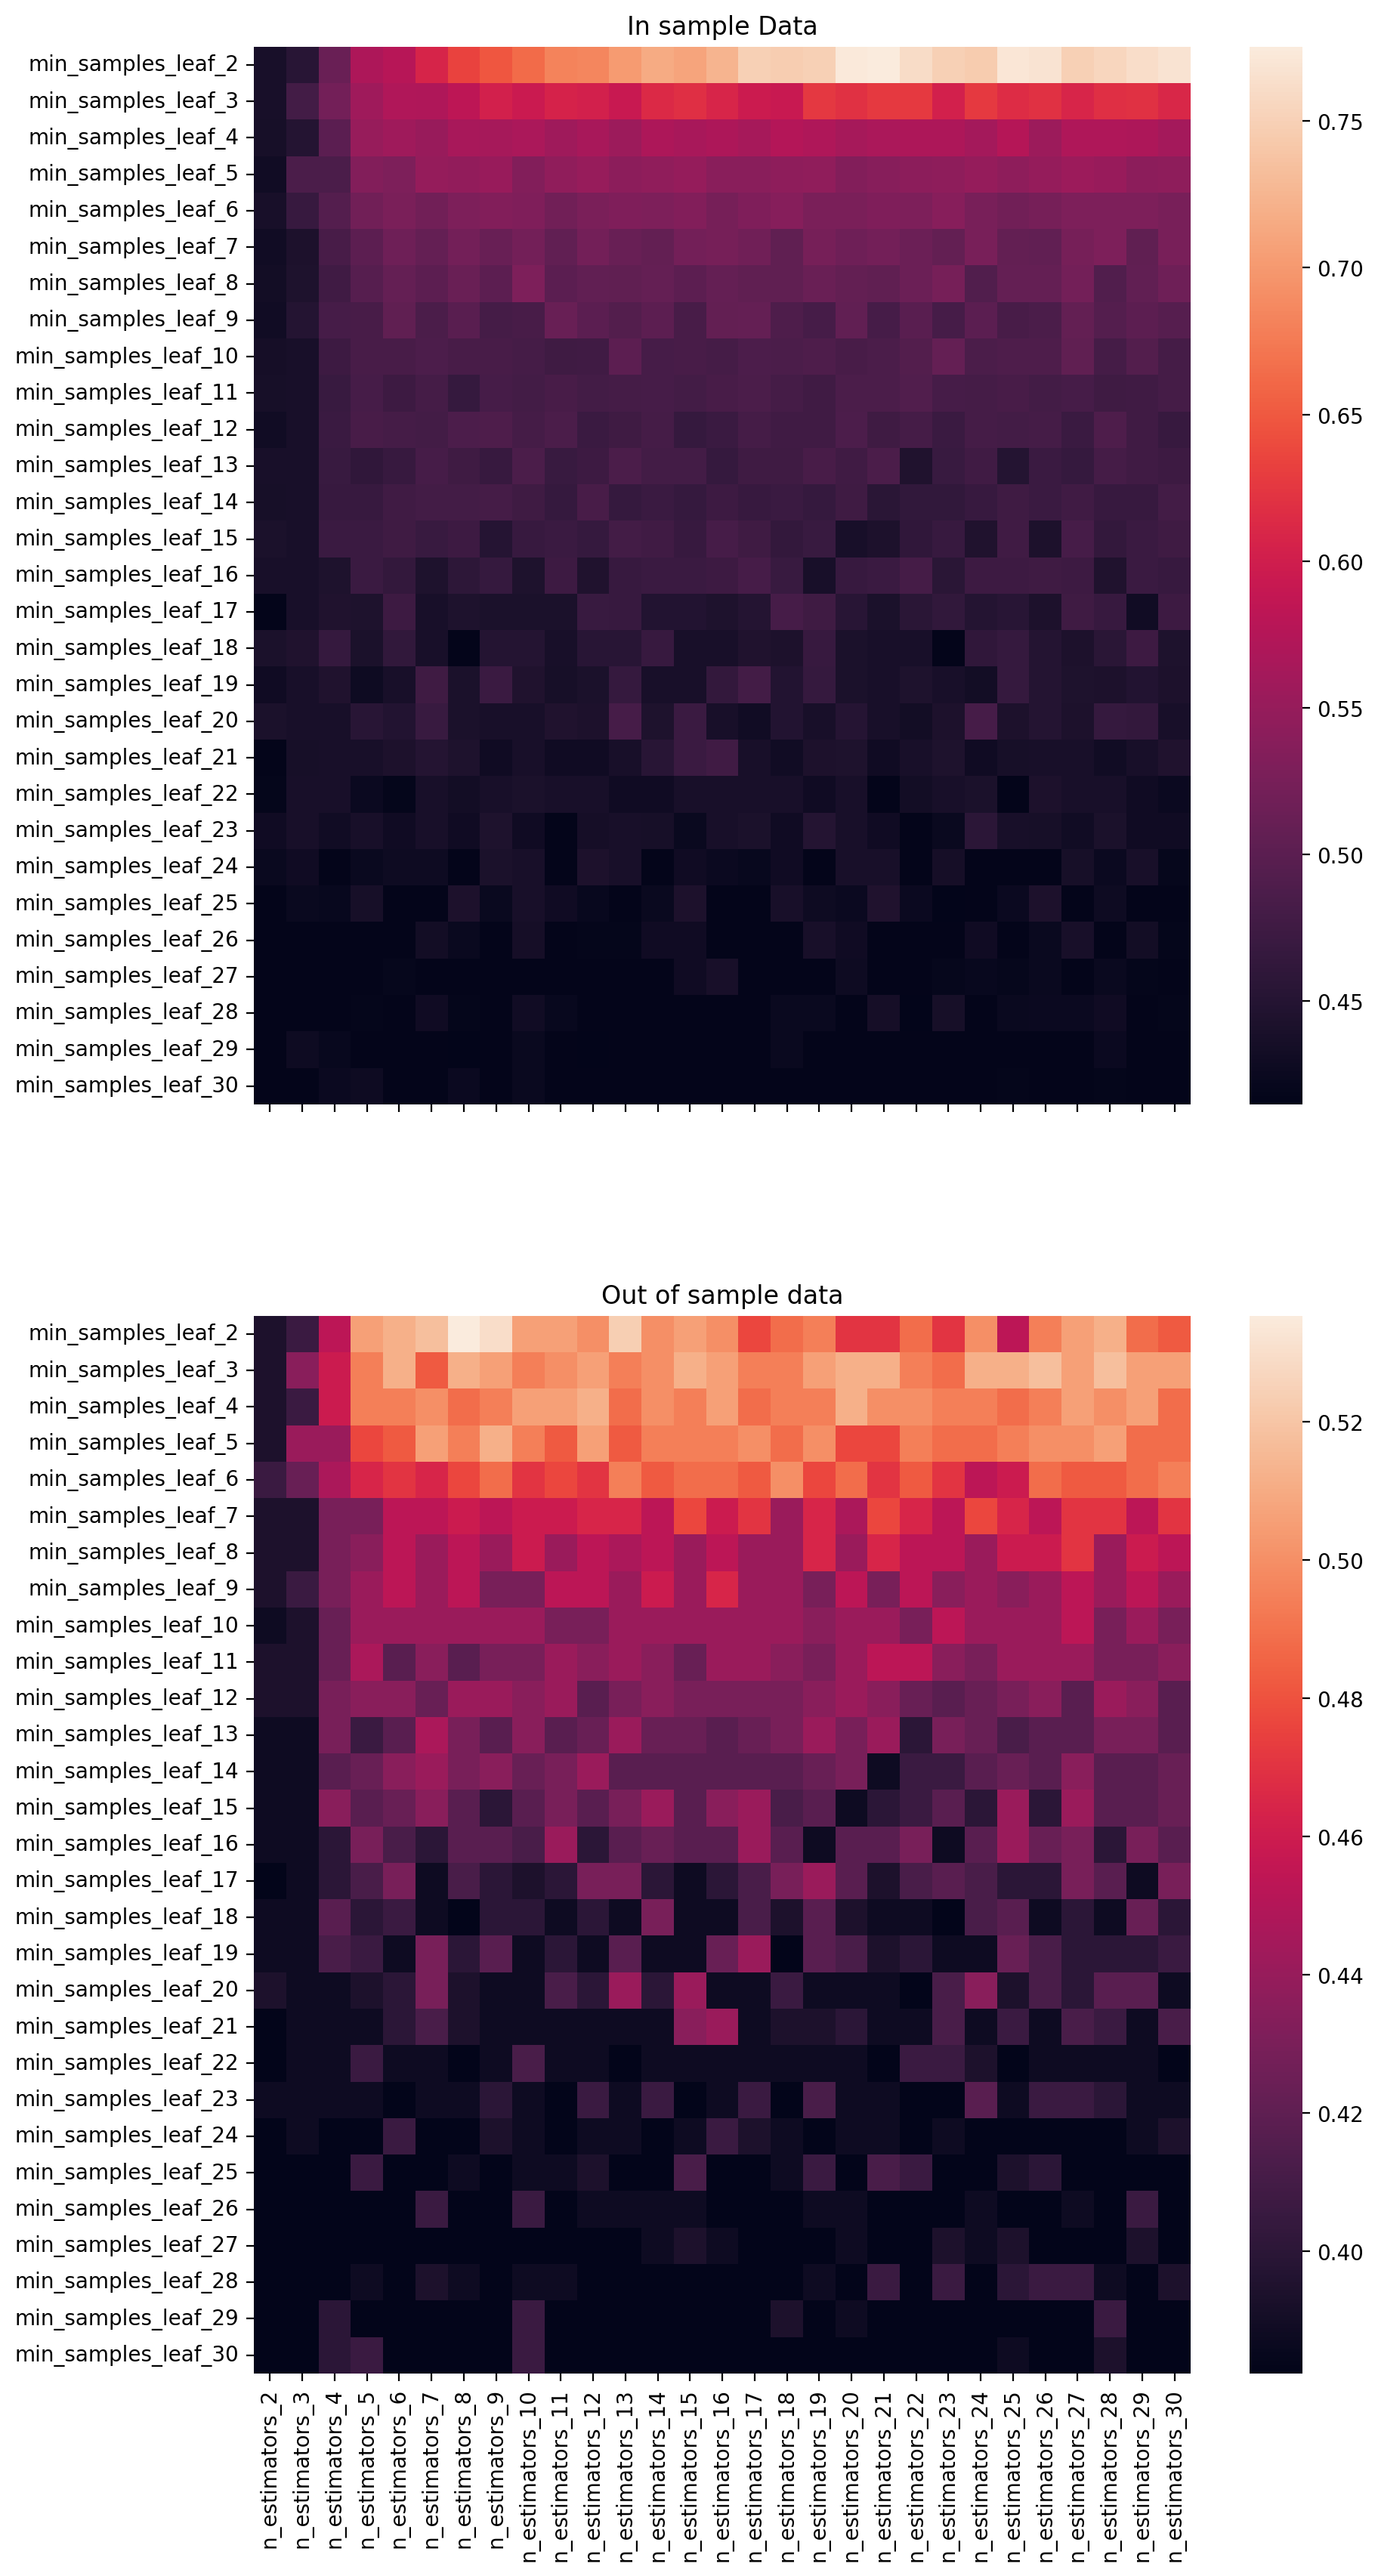

In [96]:
reload(m)
rf_train, rf_valid = m.tune_random_forest(train_x,train_y,valid_x,valid_y,max_depth=(2,31,1))

fig,axs = plt.subplots(2,1,figsize=(10,20),sharex=True)

sns.heatmap(rf_train,ax=axs[0])
axs[0].set_title('In sample Data')
sns.heatmap(rf_valid,ax=axs[1])
axs[1].set_title('Out of sample data')
plt.show()


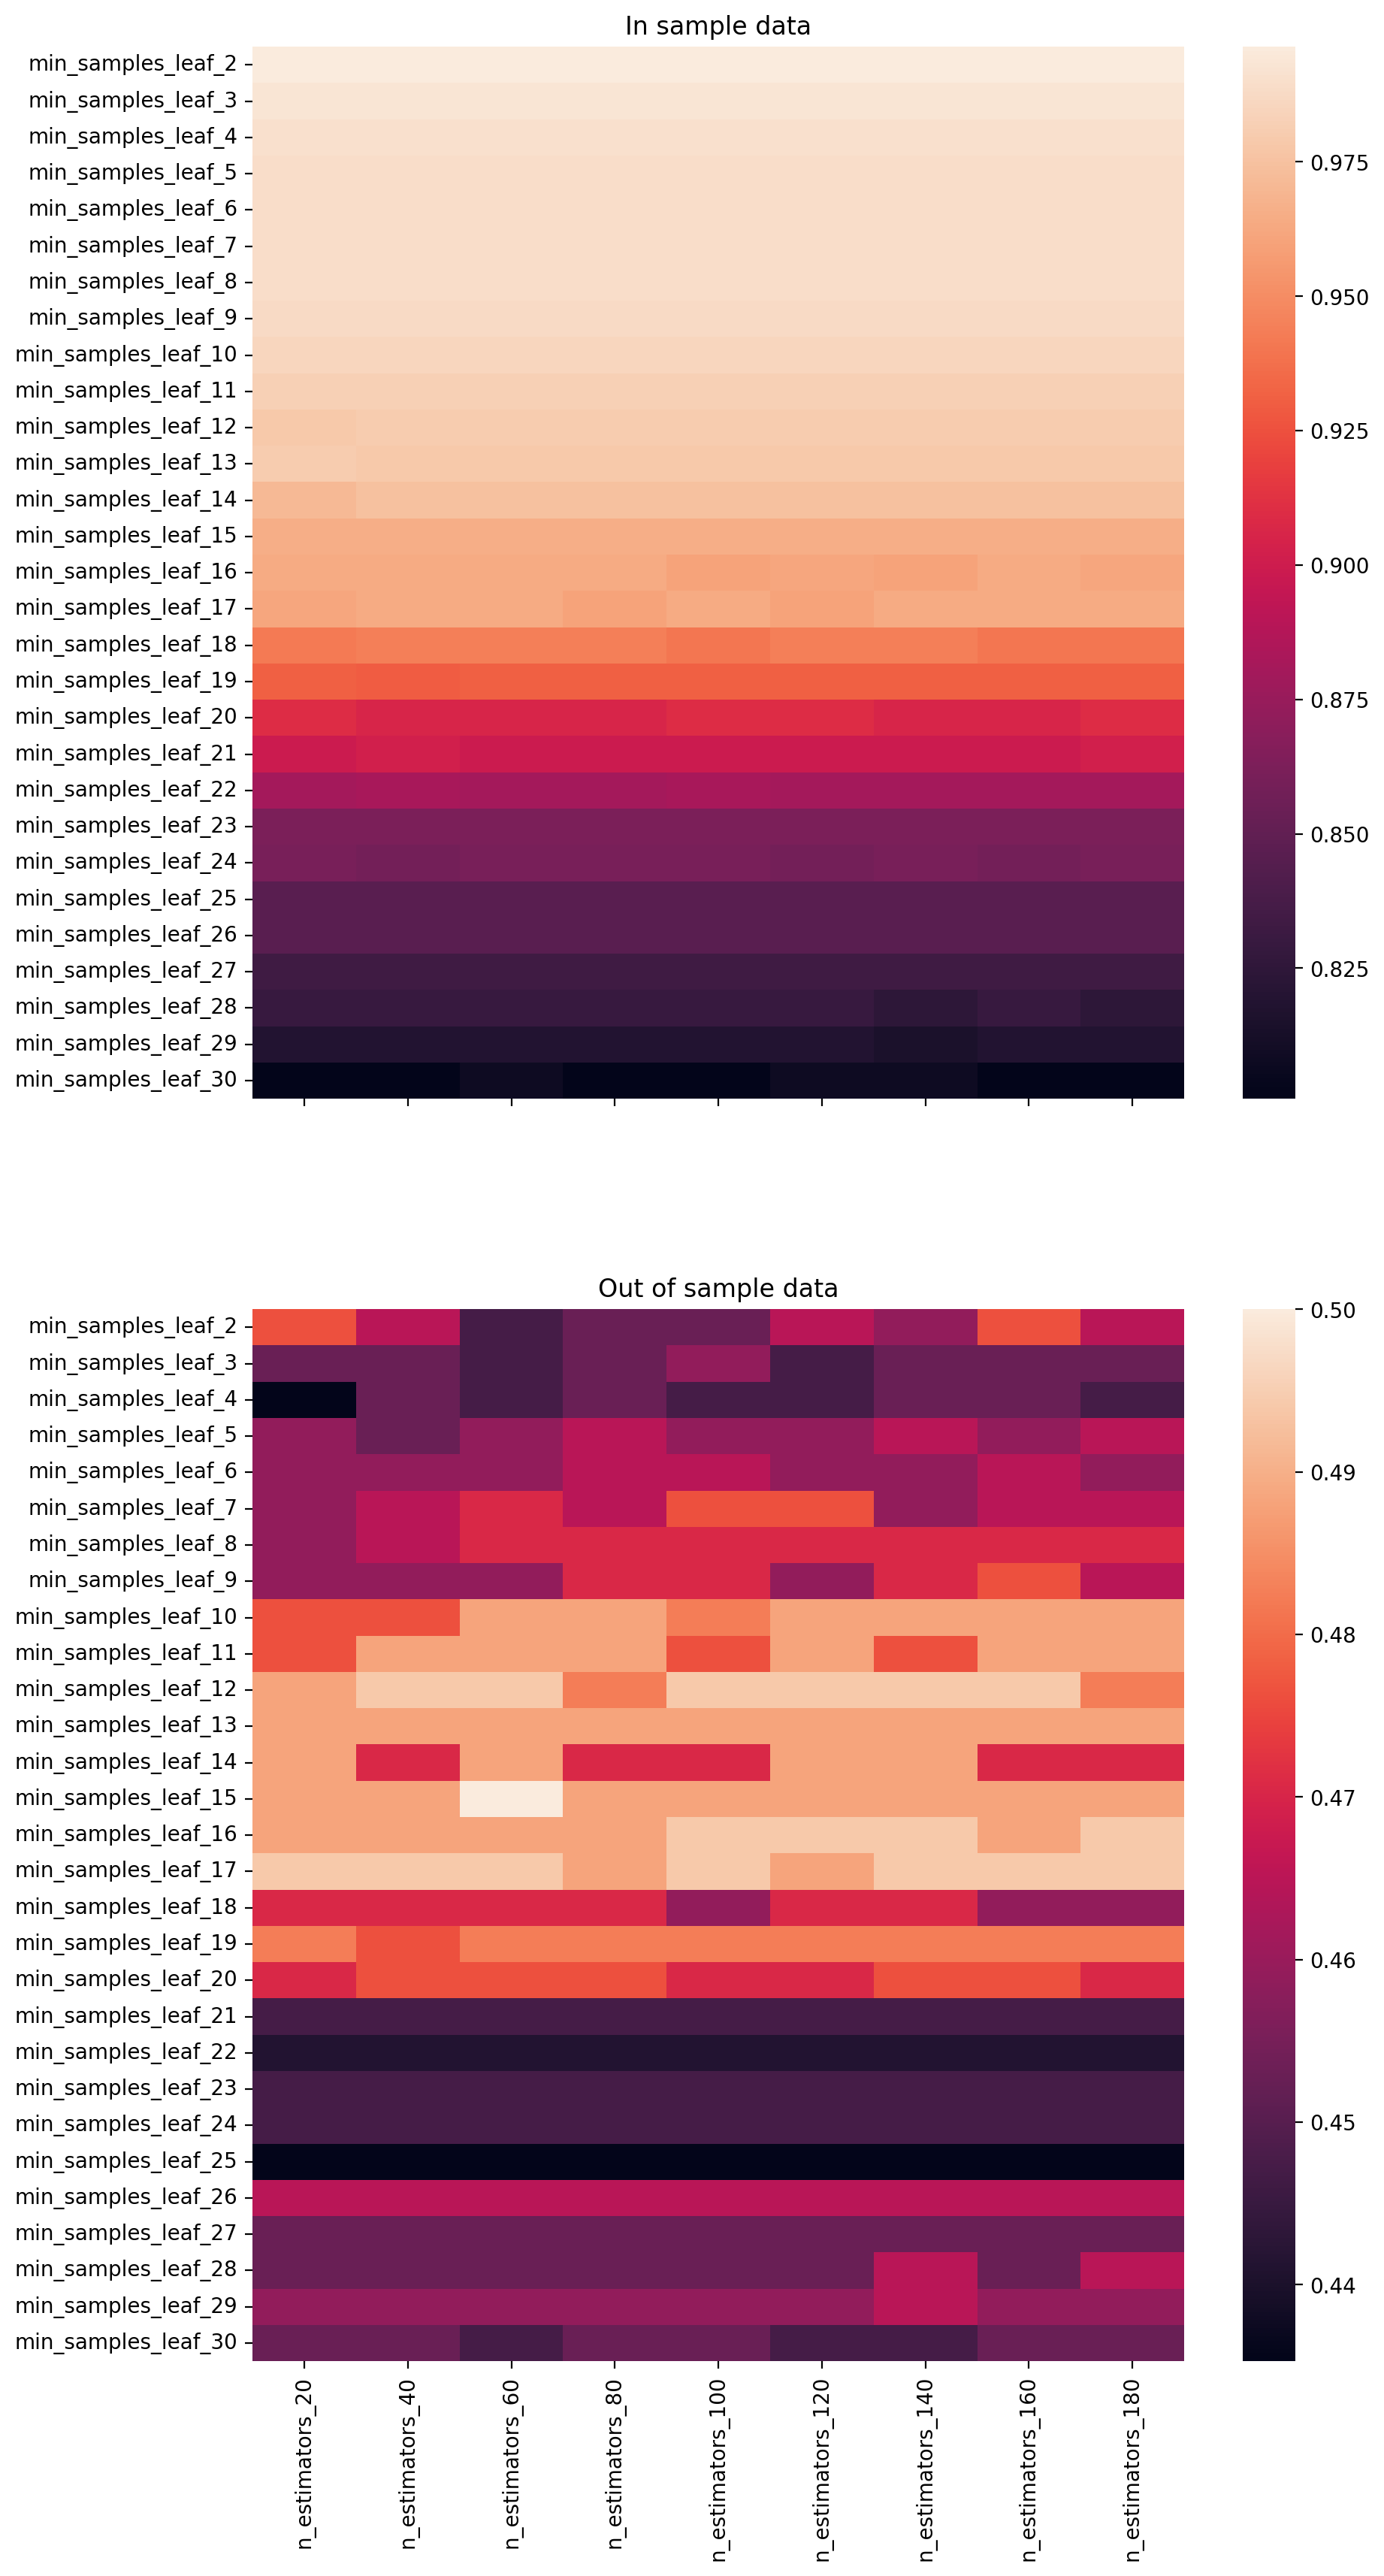

In [ ]:
fig,axs = plt.subplots(2,1,figsize=(10,20),sharex=True)
sns.heatmap(xg_train,ax=axs[0])
axs[0].set_title('In sample data')
sns.heatmap(xg_valid,ax=axs[1])
axs[1].set_title('Out of sample data')
plt.show()

In [126]:
rf_train.head()

,n_estimators_2,n_estimators_3,n_estimators_4,n_estimators_5,n_estimators_6,n_estimators_7,n_estimators_8,n_estimators_9,n_estimators_10,n_estimators_11,...,n_estimators_21,n_estimators_22,n_estimators_23,n_estimators_24,n_estimators_25,n_estimators_26,n_estimators_27,n_estimators_28,n_estimators_29,n_estimators_30
min_samples_leaf_2,0.438406,0.452899,0.512681,0.568841,0.577899,0.606884,0.634058,0.648551,0.663043,0.681159,...,0.775362,0.760870,0.750000,0.744565,0.769928,0.768116,0.750000,0.755435,0.762681,0.768116
min_samples_leaf_3,0.438406,0.478261,0.521739,0.557971,0.572464,0.570652,0.583333,0.603261,0.594203,0.605072,...,0.626812,0.626812,0.603261,0.626812,0.615942,0.619565,0.608696,0.617754,0.619565,0.610507
min_samples_leaf_4,0.436594,0.449275,0.500000,0.550725,0.557971,0.552536,0.565217,0.563406,0.567029,0.557971,...,0.567029,0.568841,0.568841,0.561594,0.576087,0.554348,0.570652,0.570652,0.568841,0.561594
min_samples_leaf_5,0.431159,0.485507,0.485507,0.534420,0.528986,0.548913,0.547101,0.552536,0.534420,0.545290,...,0.538043,0.541667,0.543478,0.548913,0.543478,0.548913,0.554348,0.552536,0.541667,0.543478
min_samples_leaf_6,0.438406,0.467391,0.494565,0.519928,0.527174,0.519928,0.528986,0.534420,0.530797,0.519928,...,0.530797,0.528986,0.538043,0.525362,0.519928,0.523551,0.528986,0.528986,0.528986,0.525362


In [154]:
rf_avg = (results['rf_train'] + results['rf_valid']) / 2
rf_avg.max().idxmax()
rf_avg.loc[:,'n_estimators_28'].idxmax()

'2'

min_samples_leaf_2    26
min_samples_leaf_6     1
min_samples_leaf_5     1
min_samples_leaf_3     1
dtype: int64

In [117]:
results['dt_valid']

2     0.394118
3     0.429412
4     0.464706
5     0.500000
6     0.517647
7     0.547059
8     0.535294
9     0.541176
10    0.541176
11    0.529412
12    0.535294
13    0.523529
14    0.500000
15    0.517647
16    0.494118
17    0.488235
18    0.482353
19    0.482353
20    0.476471
21    0.476471
22    0.482353
23    0.476471
24    0.470588
25    0.470588
26    0.470588
27    0.470588
28    0.470588
29    0.470588
30    0.470588
Name: Valid Data, dtype: float64